# Juntando os dados Censitários ao Dataset

In [1]:
%matplotlib inline

import pandas as pd 
import geopandas as gpd

In [2]:
#Importando o arquivo 'setor'
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

<AxesSubplot:>

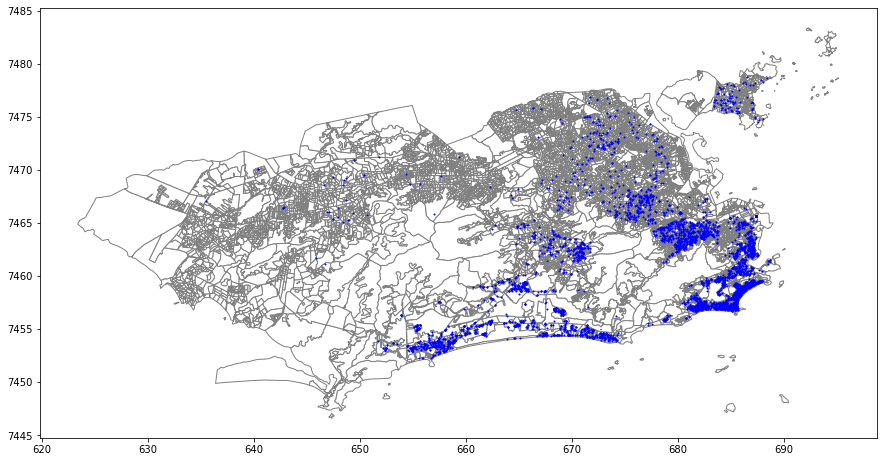

In [3]:
# Plotando
base = setor.plot(color='white', edgecolor = 'grey', figsize=(15,8))
geo_dados.plot(ax=base, color='blue', markersize=1)

In [4]:
#Alterando crs
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [5]:
# "Juntando" os dataframes
geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')

In [6]:
geo_dados.shape

(4516, 64)

In [8]:
# removendo os valores duplicados
~geo_dados.index.duplicated(keep='first')

array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep='first')]

geo_dados.shape

(4513, 64)

In [10]:
# Salvando
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')